# Saving and Loading Models
We will see how to save and load models in PyTorch. It is important because often we want to load the previously trained models to use:  
1. in making predictions  
2. to continue training  

In [1]:
# this is to have the figures displayed in the
# code and to set a format for the disaplying
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
# For the first time we have to set @download=True@ to download the dataset
trainset = datasets.FashionMNIST('.\\F_MNIST\\', download=False, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('.\\F_MNIST\\', download=False, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here, we can see an image of the training set.  
Each time we run the cell, we have that the subsequent batch of images is loaded.  
And then, we are selecting the first image of the batch.

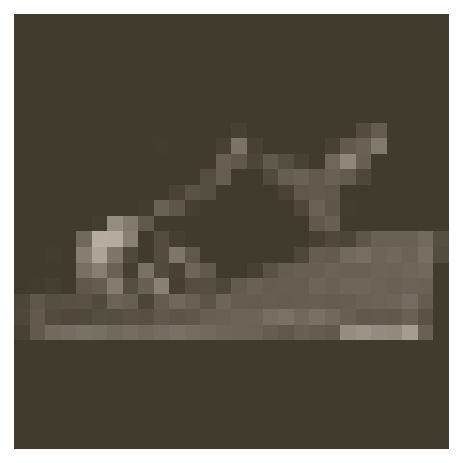

In [3]:
image, label = next(iter(trainloader))
# we take the first image of a batch of the train set
helper.imshow(image[0,:]);

## Train a Network
The network defined in a previous notebook is reported in the module `fc_model`. Importing this, we can easily create a fully connected layer with `fc_model.Network` and train it with `fc_model.train`. We are going to save the model after it is trained. And then we will see how to load the model.

In [11]:
# for how is defined the model, we have that the first two parameters of the functin @fc_model.Network@
# takes the number of input nodes and the number of output nodes, then a list with the number of all the
# layers in the hidden layers
model = fc_model.Network(784, 10, [512, 256, 128])
# the network ends with a logSoftMax layer, so we have to use a Negative Log Likelihood Loss function.
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.497..  Test Loss: 0.886..  Test Accuracy: 0.638
Epoch: 1/2..  Training Loss: 0.994..  Test Loss: 0.757..  Test Accuracy: 0.692
Epoch: 1/2..  Training Loss: 0.885..  Test Loss: 0.680..  Test Accuracy: 0.747
Epoch: 1/2..  Training Loss: 0.812..  Test Loss: 0.641..  Test Accuracy: 0.752
Epoch: 1/2..  Training Loss: 0.806..  Test Loss: 0.637..  Test Accuracy: 0.758
Epoch: 1/2..  Training Loss: 0.793..  Test Loss: 0.664..  Test Accuracy: 0.750
Epoch: 1/2..  Training Loss: 0.789..  Test Loss: 0.653..  Test Accuracy: 0.764
Epoch: 1/2..  Training Loss: 0.795..  Test Loss: 0.633..  Test Accuracy: 0.770
Epoch: 1/2..  Training Loss: 0.779..  Test Loss: 0.613..  Test Accuracy: 0.771
Epoch: 1/2..  Training Loss: 0.780..  Test Loss: 0.618..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.760..  Test Loss: 0.614..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 0.752..  Test Loss: 0.617..  Test Accuracy: 0.777
Epoch: 1/2..  Training Loss: 0.774..  Test Loss: 0.5

## Saving and Loading Networks
It is impractical to train a network every time we want to use it. Insted, we can save trained network and use them when we need.  
So, we can use them later for predictions or for continuing to train.  
The parameters for PyTorch networks are stored in a model's `state_dict()`.  
We can see that the `state_dict()` contains the weights and biases matrices for each layer of our network.

In [12]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with `torch.save`. For example, we can save it in an object named `checkpoint.pth`.

In [14]:
torch.save(model.state_dict(), 'checkpoint.pth')

Then, we can load the `state_dict()` with `torch.load()`.

In [16]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


To load the state_dict to your network we do `model.load_state_dict(state_dict)`.

In [17]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Note: the loading of the previously saved model works only if we create a model which has the same architecture of the saved model.  
Now, we will have a size mismatch error when trying to load the saved model to a model with a different architecture.

In [18]:
# a model with a different architecture
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
model.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Network:
	size mismatch for hidden_layers.0.weight: copying a param with shape torch.Size([512, 784]) from checkpoint, the shape in current model is torch.Size([400, 784]).
	size mismatch for hidden_layers.0.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([400]).
	size mismatch for hidden_layers.1.weight: copying a param with shape torch.Size([256, 512]) from checkpoint, the shape in current model is torch.Size([200, 400]).
	size mismatch for hidden_layers.1.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([200]).
	size mismatch for hidden_layers.2.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([100, 200]).
	size mismatch for hidden_layers.2.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([100]).
	size mismatch for output.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 100]).

This means that we have to build the model exactly as it was when trained. Information about the model architecture has to be saved in the checkpoint, along with the state dict.  
To do this, we can build a dictionary with all the information about the architecture of the network we are going to save (even though, you can use another type of object).  

In [19]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

Now, the checkpoint model has all the information to rebuild the train model.  
We create a custom function to load the checkpoint`load_checkpoint`.

In [21]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [22]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
